title: Hello Data!
author: Heather Ann Dye
date: 10/26/2022
category: data science





Hello data science! This is the first post in my data science blog. I enjoy creating examples and simulations, so let's look at confidence intervals. 
We frequently talk about 95% or 90% confidence intervals. 

In [37]:
import random 
import pandas as pd


In [38]:
mydata = pd.Series([random.uniform(0,10) for i in range(50)])

In [39]:
mydata.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: None
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [40]:
mydata.describe()

count    50.000000
mean      4.986736
std       2.963061
min       0.731407
25%       2.793014
50%       4.562617
75%       7.390619
max       9.891003
dtype: float64

In [14]:
from scipy.stats import t

<AxesSubplot: >

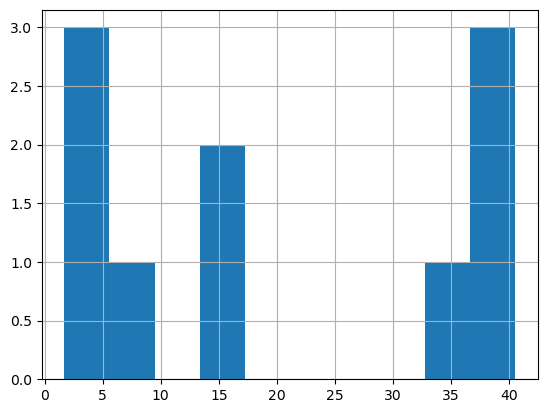

In [35]:
import matplotlib
type(mydata)
mydata.hist()

In [41]:
t_alpha = t.ppf(0.95, df=49)

Note that the confidence interval formula is: $$\bar{x} \pm \frac{s}{\sqrt{n}} t_{\alpha, df}.$$

In [42]:
xbar= mydata.mean()
mysd = mydata.std()

In [43]:
from numpy import sqrt
(xbar - mysd/ sqrt(len(mydata)) * t.ppf(0.95, len(mydata)-1), xbar + mysd/ sqrt(len(mydata)) * t.ppf(0.95, len(mydata)-1))

(4.284194065272484, 5.689278265326205)

Now, we can investigate what exactly the confidence level means. 

In [44]:
def student_t_confidence(data):
    xbar = data.mean()
    mysd = data.std()/sqrt(len(data))
    tsig = t.ppf(0.95, len(data)-1)
    return (xbar - mysd*tsig, xbar+mysd*tsig )

In [45]:
student_t_confidence(mydata)

(4.284194065272484, 5.689278265326205)

In [54]:

def make_some_fake_data(count: int):
    local_df = pd.DataFrame()
    for i in range(20):
        local_list =[random.uniform(0,10) for j in range(50)]
        local_df[f"sample {i}"]=local_list
    return local_df
    


In [55]:
mydf = make_some_fake_data(4)

In [56]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample 0   50 non-null     float64
 1   sample 1   50 non-null     float64
 2   sample 2   50 non-null     float64
 3   sample 3   50 non-null     float64
 4   sample 4   50 non-null     float64
 5   sample 5   50 non-null     float64
 6   sample 6   50 non-null     float64
 7   sample 7   50 non-null     float64
 8   sample 8   50 non-null     float64
 9   sample 9   50 non-null     float64
 10  sample 10  50 non-null     float64
 11  sample 11  50 non-null     float64
 12  sample 12  50 non-null     float64
 13  sample 13  50 non-null     float64
 14  sample 14  50 non-null     float64
 15  sample 15  50 non-null     float64
 16  sample 16  50 non-null     float64
 17  sample 17  50 non-null     float64
 18  sample 18  50 non-null     float64
 19  sample 19  50 non-null     float64
dtypes: float64(2

In [77]:
mydict = {}
for j in range(mydf.shape[1]):
    results = student_t_confidence(mydf.iloc[:,j])
    mydict.update({j:results})


In [78]:

mydict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [80]:
def count_the_good_ones(local_dict, truemean):
    count = 0 
    for i in range(len(local_dict)):
        therange = local_dict.get(i)
        if therange[0] < truemean and therange[1]> truemean:
            count +=1 
    return count 

In [81]:
thenum = count_the_good_ones(mydict, 5)

In [82]:
thenum

17

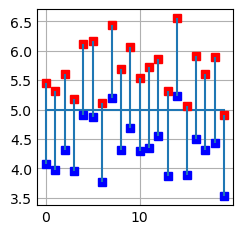

In [104]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([5 for i in range(20)])
themins = [mydict.get(i)[0] for i in range(20)]
plt.plot(themins, 'bs')
themax = [mydict.get(i)[1] for i in range(20)]
plt.plot(themax, 'rs')
for i in range(20):
    plt.vlines(x=i, ymin=themins[i], ymax=themax[i])